<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from keras.layers import LSTM,GRU,SimpleRNN,ConvLSTM2D
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding,BatchNormalization,Conv3D

from keras.datasets import imdb
from keras import backend as K
import pandas as pd
import numpy as np


In [11]:


max_features = 5000
# cut texts after this number of words (among top max_features most common words)
maxlen = 40
batch_size = 16

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)



Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 40)
x_test shape: (25000, 40)


#LSTM

In [13]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(4, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/3
1563/1563 [==============================] - 87s 54ms/step - loss: 0.5055 - accuracy: 0.7579 - val_loss: 0.4321 - val_accuracy: 0.8004
Epoch 2/3
1563/1563 [==============================] - 82s 53ms/step - loss: 0.3775 - accuracy: 0.8312 - val_loss: 0.4246 - val_accuracy: 0.8050
Epoch 3/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4471 - accuracy: 0.8016
Test score: 0.4470888376235962
Test accuracy: 0.8015999794006348


#Simple RNN

In [23]:

# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

step = 4
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()


values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_18 (Dense)            (None, 8)                 264       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 - 1s - loss: 1.1387 - 1s/epoch - 24ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4376 - 79ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.4128 - 89ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 0.4109 - 85ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 0.4099 - 100ms/epoch - 2ms/step
Epoch

#GRU

In [28]:
model = Sequential()
model.add(GRU(2, activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)


Epoch 1/100
50/50 - 2s - loss: 0.9149 - 2s/epoch - 33ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4615 - 95ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.4261 - 87ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 0.4227 - 93ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 0.4218 - 102ms/epoch - 2ms/step
Epoch 6/100
50/50 - 0s - loss: 0.4197 - 98ms/epoch - 2ms/step
Epoch 7/100
50/50 - 0s - loss: 0.4176 - 90ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 0.4174 - 94ms/epoch - 2ms/step
Epoch 9/100
50/50 - 0s - loss: 0.4158 - 100ms/epoch - 2ms/step
Epoch 10/100
50/50 - 0s - loss: 0.4159 - 92ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 0.4153 - 104ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 0.4142 - 86ms/epoch - 2ms/step
Epoch 13/100
50/50 - 0s - loss: 0.4140 - 86ms/epoch - 2ms/step
Epoch 14/100
50/50 - 0s - loss: 0.4142 - 97ms/epoch - 2ms/step
Epoch 15/100
50/50 - 0s - loss: 0.4136 - 87ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0s - loss: 0.4125 - 99ms/epoch - 2ms/step

#ConvLSTM2D

In [32]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:500], shifted_movies[:500], batch_size=10,
        epochs=2, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch 1/2
48/48 [==============================] - 1222s 25s/step - loss: 0.7808 - val_loss: 0.6893
Epoch 2/2
48/48 [==============================] - 1173s 24s/step - loss: 0.7541 - val_loss: 0.6863


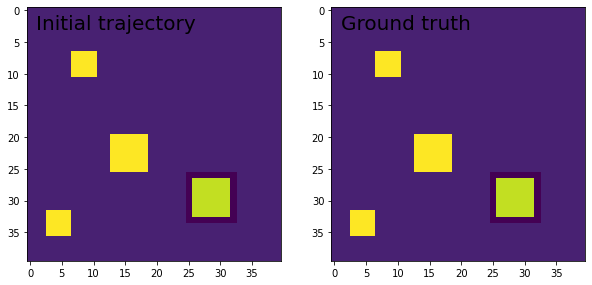

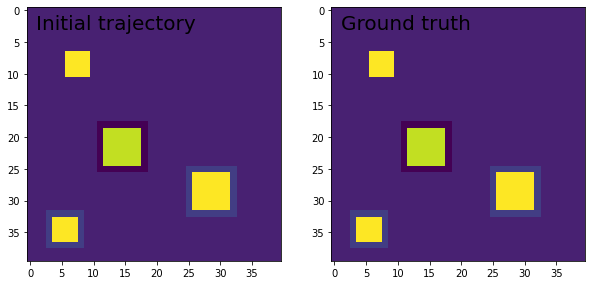

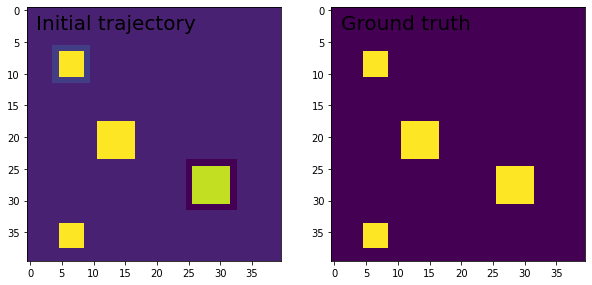

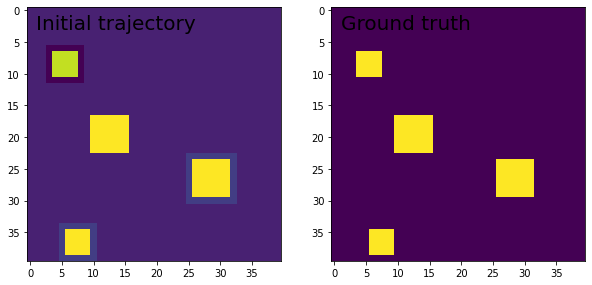

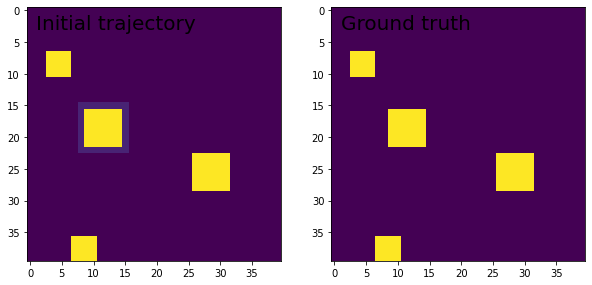

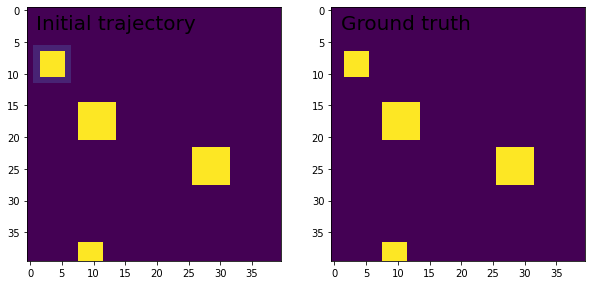

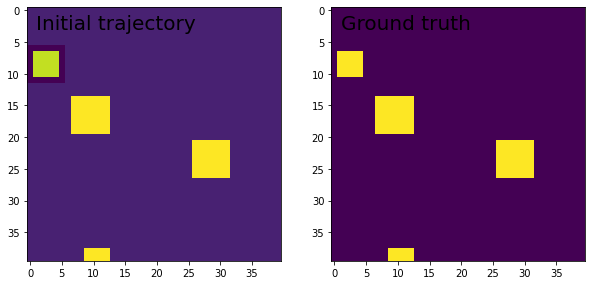

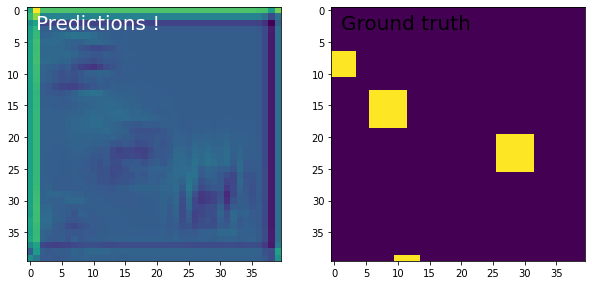

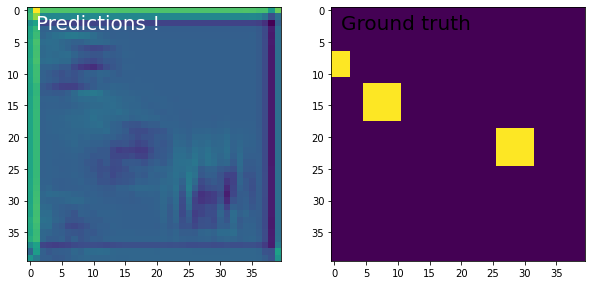

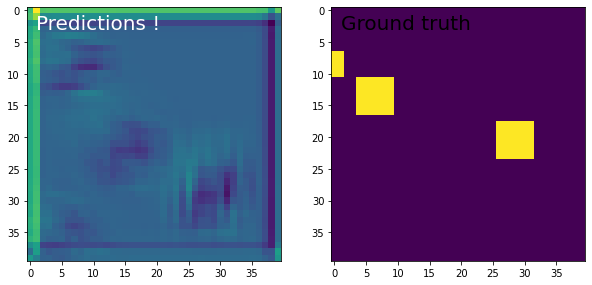

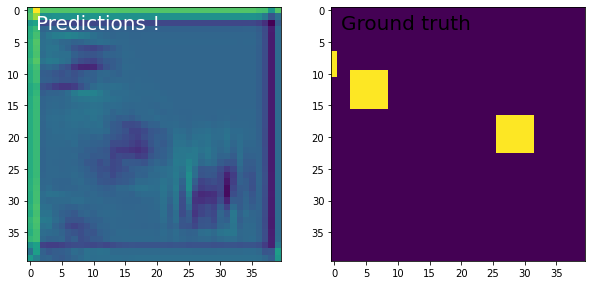

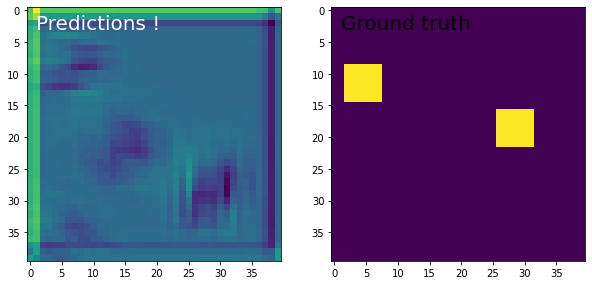

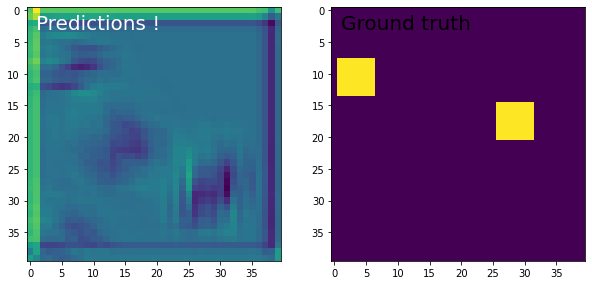

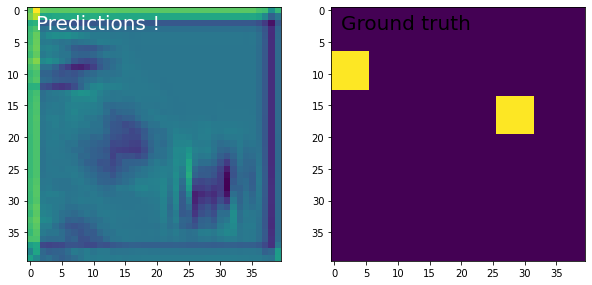

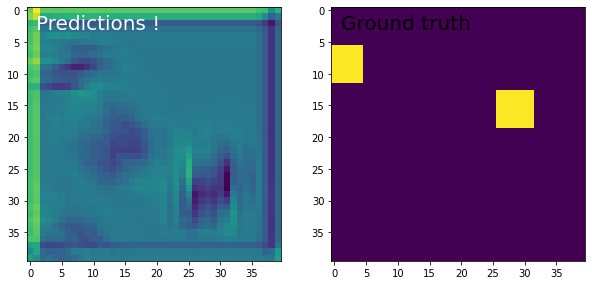

In [33]:
import matplotlib.pyplot as plt

for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

#Explanation of other classes

* RNN 

Recurrent neural networks (RNN) are a class of neural networks that are helpful in modeling sequence data
* SimpleRNNCell

This class processes one step within the whole time sequence input, whereas tf.keras.layer.SimpleRNN processes the whole sequence.

* GRUCell

Cell class for the GRU layer.


* LSTMCell

LSTMCell is an object (which happens to be a layer too) used by the LSTM layer that contains the calculation logic for one step


* StackedRNNCell

Stacked LSTMs are now a stable technique for challenging sequence prediction problems. A Stacked LSTM architecture can be defined as an LSTM model comprised of multiple LSTM layers


* CuDNNGRU

Fast GRU implementation backed by cuDNN.

* CuDNNLSTM

Fast LSTM implementation backed by cuDNN.